### Data Structures(1): Vocab, Lexemes and StringStore

#### Shared Vocab and string store(1)

spaCy stores all shared data in a vocabulary, the Vocab.

This includes words, but also the labels schemes for tags and entities.

To save memory, all strings are encoded to hash IDs. If a word occurs more than once, we don't need to save it every time.

Instead, spaCy uses a hash function to generate an ID and stores the string only once in the string store. The string store is available as nlp dot vocab dot strings.

It's a lookup table that works in both directions. You can look up a string and get its hash, and look up a hash to get its string value. Internally, spaCy only communicates in hash IDs.

Hash IDs can't be reversed, though. If a word in not in the vocabulary, there's no way to get its string. That's why we always need to pass around the shared vocab.

1. Vocab: stores data shared accross multiple documents
2. To save memory, spaCy encodes all strings to hash values
3. Strings are only stored onec in the StringStore via nlp.vocab.strings
4. String store: lookup table in both directions
5. Hashes can't be reversed - that's why we need to provide the shared vocab

In [6]:
#!python -m spacy download en_core_web_lg

In [1]:
import spacy
from spacy import strings
nlp = spacy.load('en_core_web_lg')
coffee_hash = nlp.vocab.strings['coffee']
coffee_string = nlp.vocab.strings[coffee_hash]

In [2]:
#list(nlp.vocab.strings)

In [3]:
coffee_hash

3197928453018144401

In [4]:
coffee_string

'coffee'

In [5]:
# Raises error if we haven't seen the string before
string = nlp.vocab.strings[3197928453018144401]

In [6]:
string

'coffee'

#### Shared vocab and string store Part2

To get the hash for a string, we can look it up in nlp dot vocab dot strings.

To get the string representation of a hash, we can look up the hash.

A Doc object also exposes its vocab and strings.

1. Look up the string and hash in nlp.vocab.strings

In [7]:
doc = nlp('I love coffee')
print('hash value:', nlp.vocab.strings['coffee'])
print('string value:', nlp.vocab.strings[3197928453018144401])

hash value: 3197928453018144401
string value: coffee


2. The doc also exposes the vocab and strings

In [8]:
doc = nlp('I love coffee')
print('hash value : ', doc.vocab.strings['coffee'])

hash value :  3197928453018144401


#### Lexemes: entries in the vocabulary

Lexemes are context-independent entries in the vocabulary.

You can get a lexeme by looking up a string or a hash ID in the vocab.

Lexemes expose attributes, just like tokens.

They hold context-independent information about a word, like the text, or whether the the word consists of alphabetic characters.

Lexemes don't have part-of-speech tags, dependencies or entity labels. Those depend on the context.

A Lexeme object is an entry in the vocabulary

In [9]:
doc = nlp('I love coffee')
lexeme = nlp.vocab['coffee']

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

coffee 3197928453018144401 True


Contains the context-independent information about a word
    1. Word text: lexeme.text and lexeme.orth(the hash)
    2. Lexical attributes like lexeme.is_alpha
    3. Not context-dependent part-of-speech tags, dependencies or entity labels
    

#### Vocab, hashes and lexemes

Example: 
    
    The Doc contains words in context – in this case, the tokens "I", "love" and "coffee" with their part-of-speech tags and dependencies.

Each token refers to a lexeme, which knows the word's hash ID. To get the string representation of the word, spaCy looks up the hash in the string store.

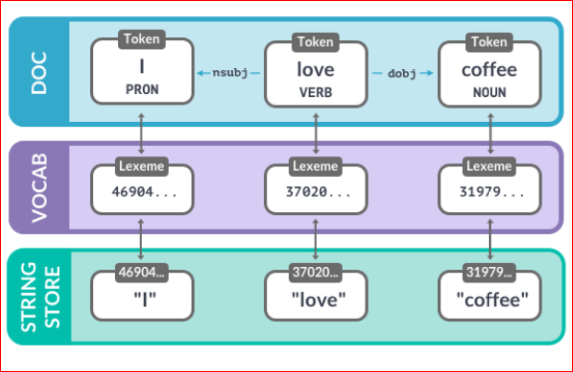

### Data Structures(2): Doc, Span and Token

The Doc is one of the central data structures in spaCy. It's created automatically when you process a text with the nlp object. But you can also instantiate the class manually.

After creating the nlp object, we can import the Doc class from spacy dot tokens.

Here we're creating a Doc from three words. The spaces are a list of boolean values indicating whether the word is followed by a space. Every token includes that information – even the last one!

The Doc class takes three arguments: the shared vocab, the words and the spaces.

In [10]:
# Create an nlp object

from spacy.lang.en import English
nlp = English()

# Import the Doc class
from spacy.tokens import Doc

# The words and spaces to create the doc from

words = ['Hello', 'world', '!']
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words = words, spaces=spaces)

In [11]:
doc

Hello world!

#### The Span Object(1)

A Span is a slice of a Doc consisting of one or more tokens. The Span takes at least three arguments: the doc it refers to, and the start and end index of the span. Remember that the end index is exclusive!

To create a Span manually, we can also import the class from spacy dot tokens. We can then instantiate it with the doc and the span's start and end index, and an optional label argument.

The doc dot ents are writable, so we can add entities manually by overwriting it with a list of spans.

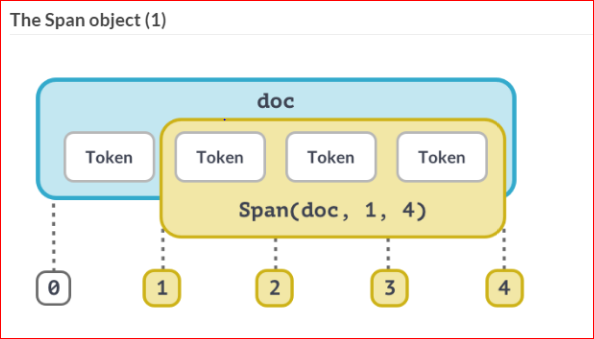

In [12]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# The words and spaces to create the doc form

words = ['Hello', 'world','!']
spaces = [True, False, False]

# Create a span manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with label
span_with_label = Span(doc, 0, 2, label='GREETING')

# Add span to the doc.ents
doc.ents = [span_with_label]

In [13]:
doc.ents

(Hello world,)

To create a Span manually, we can also import the class from spacy dot tokens. We can then instantiate it with the doc and the span's start and end index, and an optional label argument.

The doc dot ents are writable, so we can add entities manually by overwriting it with a list of spans.

#### Best Practices

1. Doc and Span are very powerful and hold references
    and relationships of words and sentences
    a. Convert result to strings as late as possible
    b. Use token attributes if available
        for example, token.i for the token.index
2. Don't forget to pass in the shared vocab

### Word Vectors and Semantic Similarity

spaCy can compare two objects and predict how similar they are – for example, documents, spans or single tokens.

The Doc, Token and Span objects have a dot similarity method that takes another object and returns a floating point number between 0 and 1, indicating how similar they are.

One thing that's very important: In order to use similarity, you need a larger spaCy model that has word vectors included.

For example, the medium or large English model – but not the small one. So if you want to use vectors, always go with a model that ends in "md" or "lg". 

1. spaCy can compare two objects and predict similarity
2. Doc.similarity(), Span.similarity() and Token.similarity()
3. Take another object and return a similarity score (0 to 1)
4. Important : needs a model that has word vectors included, for example:
        en_core_web_md
        en_core_web_lg
        but not em_core_web_sm

#### Similarity example(1)

Here's an example. Let's say we want to find out whether two documents are similar.

First, we load the medium English model, "en_core_web_md".

We can then create two doc objects and use the first doc's similarity method to compare it to the second.

Here, a fairly high similarity score of 0.86 is predicted for "I like fast food" and "I like pizza".

The same works for tokens.

According to the word vectors, the tokens "pizza" and "pasta" are kind of similar, and receive a score of 0.7.

In [15]:
# Load a larger model with vectors
nlp = spacy.load('en_core_web_lg')

# Compare two documents

doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

0.8627204117787385


In [16]:
# Compare two tokens
doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print(token1.similarity(token2))

0.73695457


#### Similarity examples(2)

You can also use the similarity methods to compare different types of objects.

For example, a document and a token.

Here, the similarity score is pretty low and the two objects are considered fairly dissimilar.

Here's another example comparing a span – "pizza and pasta" – to a document about McDonalds.

The score returned here is 0.61, so it's determined to be kind of similar.

In [17]:
# Compare a document with a token
doc = nlp("I like pizza")
token = nlp("soap")[0]

print(doc.similarity(token))

0.32531983166759537


In [20]:
# Compare a span with a document
span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")

print(span.similarity(doc))

0.6199092090831612


#### How does spaCy predict similarity?

You can also use the similarity methods to compare different types of objects.

For example, a document and a token.

Here, the similarity score is pretty low and the two objects are considered fairly dissimilar.

Here's another example comparing a span – "pizza and pasta" – to a document about McDonalds.

The score returned here is 0.61, so it's determined to be kind of similar.

1. Similarity is determined using word vectors
2. Multi-dimensional meaning representations of words
3. Generated using an algorithm like Word2Vec and lots of text
4. Can be added to spaCy's statistical models
5. Default: cosine similarity, but can be adjusted
6. Doc and Span vectors default to average of token vectors
7. Short phrases are better than long documents with many irrelevant words

####  Word Vectors in spaCy

To give you an idea of what those vectors look like, here's an example.

First, we load the medium model again, which ships with word vectors.

Next, we can process a text and look up a token's vector using the dot vector attribute.

The result is a 300-dimensional vector of the word "banana".

In [21]:
# Load a larger model with vectors
nlp = spacy.load('en_core_web_lg')

doc = nlp("I have a banana")
# Access the vector via the token.vector attribute
print(doc[3].vector)

[ 2.0228e-01 -7.6618e-02  3.7032e-01  3.2845e-02 -4.1957e-01  7.2069e-02
 -3.7476e-01  5.7460e-02 -1.2401e-02  5.2949e-01 -5.2380e-01 -1.9771e-01
 -3.4147e-01  5.3317e-01 -2.5331e-02  1.7380e-01  1.6772e-01  8.3984e-01
  5.5107e-02  1.0547e-01  3.7872e-01  2.4275e-01  1.4745e-02  5.5951e-01
  1.2521e-01 -6.7596e-01  3.5842e-01 -4.0028e-02  9.5949e-02 -5.0690e-01
 -8.5318e-02  1.7980e-01  3.3867e-01  1.3230e-01  3.1021e-01  2.1878e-01
  1.6853e-01  1.9874e-01 -5.7385e-01 -1.0649e-01  2.6669e-01  1.2838e-01
 -1.2803e-01 -1.3284e-01  1.2657e-01  8.6723e-01  9.6721e-02  4.8306e-01
  2.1271e-01 -5.4990e-02 -8.2425e-02  2.2408e-01  2.3975e-01 -6.2260e-02
  6.2194e-01 -5.9900e-01  4.3201e-01  2.8143e-01  3.3842e-02 -4.8815e-01
 -2.1359e-01  2.7401e-01  2.4095e-01  4.5950e-01 -1.8605e-01 -1.0497e+00
 -9.7305e-02 -1.8908e-01 -7.0929e-01  4.0195e-01 -1.8768e-01  5.1687e-01
  1.2520e-01  8.4150e-01  1.2097e-01  8.8239e-02 -2.9196e-02  1.2151e-03
  5.6825e-02 -2.7421e-01  2.5564e-01  6.9793e-02 -2

#### Similarity depends on the applicaton context

Predicting similarity can be useful for many types of applications. For example, to recommend a user similar texts based on the ones they have read. It can also be helpful to flag duplicate content, like posts on an online platform.

However, it's important to keep in mind that there's no objective definition of what's similar and what isn't. It always depends on the context and what your application needs to do.

Here's an example: spaCy's default word vectors assign a very high similarity score to "I like cats" and "I hate cats". This makes sense, because both texts express sentiment about cats. But in a different application context, you might want to consider the phrases as very dissimilar, because they talk about opposite sentiments.

1. Useful for many applications: recommendation systems, flagging duplicates etc.
2. There's no objective definition of "similarity"
3. Depends on the context and what application needs to do

In [22]:
doc1 = nlp("I like cats")
doc2 = nlp("I have cats")

print(doc1.similarity(doc2))

0.9568188017078232


### Combining models and rules

#### Statistical predictions vs. rules

Statistical models are useful if your application needs to be able to generalize based on a few examples.

For instance, detecting product or person names usually benefits from a statistical model. Instead of providing a list of all person names ever, your application will be able to predict whether a span of tokens is a person name. Similarly, you can predict dependency labels to find subject/object relationships.

To do this, you would use spaCy's entity recognizer, dependency parser or part-of-speech tagger.

                    Statistical Models
    
Use cases    -----   Application needs to generalize based                        on examples
Real-world examples -----   product names, person names,                                 subject/object relationships
spaCy features --------     entity recognizer, dependency                               parser, part-of-speech tagger

Rule Based :
    
Rule-based approaches on the other hand come in handy if there's a more or less finite number of instances you want to find. For example, all countries or cities of the world, drug names or even dog breeds.

In spaCy, you can achieve this with custom tokenization rules, as well as the matcher and phrase matche

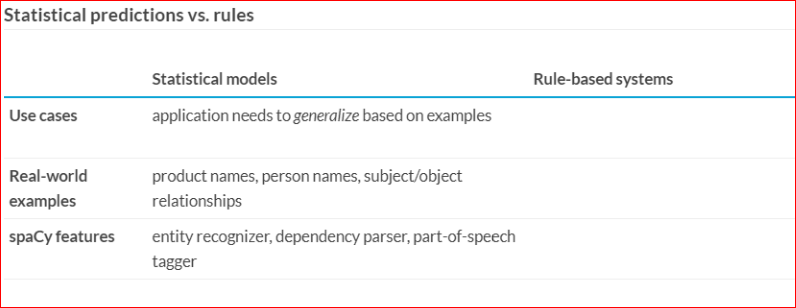

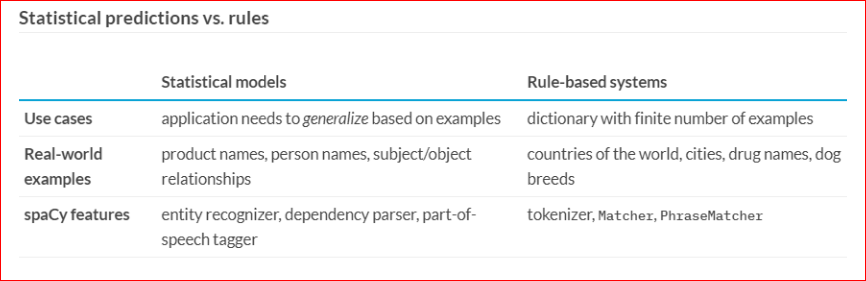

### Recap : Rule-based Matching

In the last chapter, you learned how to use spaCy's rule-based matcher to find complex patterns in your texts. Here's a quick recap.

The matcher is initialized with the shared vocabulary – usually nlp dot vocab.

Patterns are lists of dictionaries, and each dictionary describes one token and its attributes. Patterns can be added to the matcher using the matcher dot add method.

Operators let you specify how often to match a token. For example, "+" will match one or more times.

Calling the matcher on a doc object will return a list of the matches. Each match is a tuple consisting of an ID, and the start and end token index in the document.

In [25]:
# Initialize with the shared vocab
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

# patterns are lists of dictionaries describing the tokens
pattern = [{'LEMMA':'love', 'POS':'VERB'},{'LOWER':'cats'}]
matcher.add('LOVE_CATS', None, pattern)

# Operators can specify how ofter a token should be matched
pattern = [{'TEXT':'very', 'OP':'+'}, {'TEXT':'happy'}]
matcher.add('VERY_HAPPY', None, pattern)

# Calling matcher on doc returns list of (match_id, start, end) tuples
doc = nlp("I love cats and I'm very happy")
matches = matcher(doc)
matches

[(9137535031263442622, 1, 3), (2447047934687575526, 6, 8)]

#### Adding statistical predictions

In [26]:
matcher = Matcher(nlp.vocab)
matcher.add('DOG', None, [{'LOWER':'golden'}, {'LOWER':'retriever'}])
doc = nlp("I have a Golden Retriever")


for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("Matched span: ", span.text)
    # Get the span's root token and root head token
    print("Root token: ", span.root.text)
    print("Root head token: ", span.root.head.text)
    # Get the previous token and its POS tag
    print("Previous token: ", doc[start-1].text, doc[start-1].pos_)

Matched span:  Golden Retriever
Root token:  Retriever
Root head token:  have
Previous token:  a DET


#### Efficient phrase matching(1)

The phrase matcher is another helpful tool to find sequences of words in your data.

It performs a keyword search on the document, but instead of only finding strings, it gives you direct access to the tokens in context.

It takes Doc objects as patterns.

It's also really fast.

This makes it very useful for matching large dictionaries and word lists on large volumes of text.

1. PhraseMatcher like regular expression or keyword search - but with access to the tokens!
2. Takes Doc object as patterns
3. More efficient and faster than the Matcher
4. Great for matching large word lists

#### Efficient phrase matching(2)

Here's an example.

The phrase matcher can be imported from spacy dot matcher and follows the same API as the regular matcher.

Instead of a list of dictionaries, we pass in a Doc object as the pattern.

We can then iterate over the matches in the text, which gives us the match ID, and the start and end of the match. This lets us create a Span object for the matched tokens "Golden Retriever" to analyze it in context.

In [27]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

pattern = nlp("Golden Retriever")
matcher.add('DOG', None, pattern)
doc = nlp("I have a Golden Retriever")

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Get the matched span
    span = doc[start:end]
    print('Matched span: ', span.text)

Matched span:  Golden Retriever
